In [1]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocotools import mask as cocomask
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

VAL_IMAGES_PATH = '../data/raw/val/images'
VAL_GROUND_TRUTH_PATH = '../data/raw/val/annotation.json'
PREDICTIONS_PATH = '../data/experiments_eval/prediction.json'

In [2]:
coco_ground_truth = COCO(VAL_GROUND_TRUTH_PATH)
coco_pred = coco_ground_truth.loadRes(PREDICTIONS_PATH)
image_ids = coco_ground_truth.getImgIds()

loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!


# Choose image id

In [26]:
image_id = random.choice(image_ids) # or by hand
print(image_id)

24380


# Plotting

In [27]:
img = coco_ground_truth.loadImgs(image_id)[0]

annotations_gt = coco_ground_truth.loadAnns(coco_ground_truth.getAnnIds(imgIds=img['id']))
annotations_pred = coco_pred.loadAnns(coco_pred.getAnnIds(imgIds=img['id']))

image_path = os.path.join(VAL_IMAGES_PATH, img["file_name"])
I = io.imread(image_path)

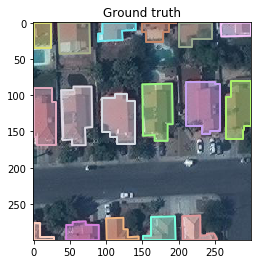

In [29]:
plt.imshow(I);
coco_ground_truth.showAnns(annotations_gt)
plt.title('Ground truth');

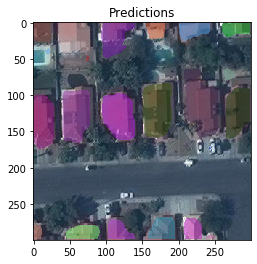

In [30]:
plt.imshow(I);
coco_pred.showAnns(annotations_pred)
plt.title('Predictions');